In [1]:
import pandas as pd  
import numpy as np  
import tensorflow as tf  
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Read Datasets Greenhouse Data
temp_emissions_data_raw = pd.read_csv('Datasets/TempEmissionsDataRaw.csv')
temp_emissions_data = pd.read_csv('Datasets/TempEmissionsData.csv') # Emissions normalized (10^3)

In [3]:
temp_emissions_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14826 entries, 0 to 14825
Data columns (total 4 columns):
Year                  14826 non-null int64
Country               14826 non-null object
AverageTemperature    14826 non-null float64
EmissionsValue        14826 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 463.4+ KB


In [4]:
temp_emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
Year                  263 non-null int64
AverageTemperature    263 non-null float64
EmissionsValue        263 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


In [5]:
# Remove Year Column
temp_emissions_data_no_year = temp_emissions_data.drop('Year', axis=1)
temp_emissions_data_no_year

,AverageTemperature,EmissionsValue
0,5.890000,2.552000
1,3.130000,2.553000
2,8.430000,2.553000
3,8.340000,2.554000
4,8.050000,2.555000
5,8.540000,2.731000
6,8.500000,2.732000
7,7.700000,2.733000
8,8.680000,2.734000
9,8.030000,2.734000


In [6]:
temp_emissions_data_no_year.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,263.0,11.539664,5.778322,3.130000,6.742321,8.73000,16.635176,20.930000
EmissionsValue,263.0,12.059036,10.797191,1.434143,2.788994,9.70337,18.159720,47.044396


In [57]:
# Get the features
X = temp_emissions_data_no_year['EmissionsValue'].to_frame() # independent variable - GasEmissions
y = temp_emissions_data_no_year['AverageTemperature'].to_frame() # dependent variable - AverageTemperature

In [58]:
## Split data into train, test and validation set

In [59]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)  

In [60]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

In [61]:
X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   210, Training features   1
Validation instances 27, Validation features 1
Testing instances    26, Testing features    1


In [62]:
# Define the feature columns - Only gas emissions in this case
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns] 
feature_cols

[_NumericColumn(key='EmissionsValue', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [63]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[50, 50],
                                      model_dir='tf_avg_temp_pred_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_is_chief': True, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efd4d9a8780>, '_model_dir': 'tf_avg_temp_pred_model', '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_master': '', '_global_id_in_cluster': 0, '_evaluation_master': '', '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_service': None, '_tf_random_seed': None, '_save_checkpoints_steps': None, '_session_config': None}


In [64]:
def avg_temp_pred_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):  
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [65]:
evaluations = []  

# Steps are used to calculate the number of epochs, which is based on the following calculation:
# (100 X 215 / (400/210)) = 21500 epochs
# Where 100 is the number of loops
# 215 is the number of STEPS defined below
# 400 is the bactch size
# 210 is the size of the training data
# STEPS <= 150  -> OK
# STEPS >= 200 && <= 250 -> Better
# STEPS > 250 -> No bueno
STEPS = 215 # The best so far
for i in range(100):  
    regressor.train(input_fn=avg_temp_pred_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=avg_temp_pred_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 1, loss = 104987.18
INFO:tensorflow:global_step/sec: 159.346
INFO:tensorflow:step = 101, loss = 3623.9458 (0.635 sec)
INFO:tensorflow:global_step/sec: 264.027
INFO:tensorflow:step = 201, loss = 3493.121 (0.374 sec)
INFO:tensorflow:Saving checkpoints for 215 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 3275.6255.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:24:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-215
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runn

INFO:tensorflow:Saving checkpoints for 1505 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 2318.19.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:25:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-1505
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:25:22
INFO:tensorflow:Saving dict for global step 1505: average_loss = 6.3165526, global_step = 1505, loss = 170.54692
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-1505
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1506 int

INFO:tensorflow:Saving dict for global step 2795: average_loss = 6.1646423, global_step = 2795, loss = 166.44534
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-2795
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2796 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 2796, loss = 1794.9802
INFO:tensorflow:global_step/sec: 264.025
INFO:tensorflow:step = 2896, loss = 2062.8848 (0.380 sec)
INFO:tensorflow:global_step/sec: 269.208
INFO:tensorflow:step = 2996, loss = 1778.5173 (0.371 sec)
INFO:tensorflow:Saving checkpoints for 3010 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1815.3792.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation 

INFO:tensorflow:step = 4086, loss = 1801.1177
INFO:tensorflow:global_step/sec: 191.079
INFO:tensorflow:step = 4186, loss = 1849.4302 (0.534 sec)
INFO:tensorflow:global_step/sec: 186.788
INFO:tensorflow:step = 4286, loss = 1784.4934 (0.525 sec)
INFO:tensorflow:Saving checkpoints for 4300 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1955.4229.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:26:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-4300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:26:05
INFO:tensorflow:Saving dict for global step 4300: average_loss = 5.908529, global_step = 4300, loss = 159.53027
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-5590
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:26:21
INFO:tensorflow:Saving dict for global step 5590: average_loss = 5.9415135, global_step = 5590, loss = 160.42087
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-5590
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5591 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 5591, loss = 1981.7996
INFO:tensorflow:global_step/sec: 186.042
INFO:tensorflow:step = 5691, loss = 1885.9692 (0.545 sec)
INFO:tensorflow:global_step/sec: 208.989
INFO:tensorflow:step = 5791, loss = 154

INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-6880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6881 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 6881, loss = 1787.3185
INFO:tensorflow:global_step/sec: 246.595
INFO:tensorflow:step = 6981, loss = 2005.5388 (0.408 sec)
INFO:tensorflow:global_step/sec: 249.841
INFO:tensorflow:step = 7081, loss = 1575.608 (0.400 sec)
INFO:tensorflow:Saving checkpoints for 7095 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1632.8628.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:26:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-7095
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-

INFO:tensorflow:Loss for final step: 1885.4154.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:26:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-8385
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:26:56
INFO:tensorflow:Saving dict for global step 8385: average_loss = 5.660545, global_step = 8385, loss = 152.83472
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-8385
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8386 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 8386, loss = 1968.915
I

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-9675
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9676 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 9676, loss = 1730.1906
INFO:tensorflow:global_step/sec: 291.698
INFO:tensorflow:step = 9776, loss = 1801.6423 (0.348 sec)
INFO:tensorflow:global_step/sec: 306.274
INFO:tensorflow:step = 9876, loss = 1794.6763 (0.327 sec)
INFO:tensorflow:Saving checkpoints for 9890 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1657.4602.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:27:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp

INFO:tensorflow:step = 11066, loss = 1845.2739 (0.395 sec)
INFO:tensorflow:global_step/sec: 264.419
INFO:tensorflow:step = 11166, loss = 1891.8375 (0.378 sec)
INFO:tensorflow:Saving checkpoints for 11180 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1741.2795.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:27:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-11180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:27:30
INFO:tensorflow:Saving dict for global step 11180: average_loss = 5.5223656, global_step = 11180, loss = 149.10387
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_a

INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-12470
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:27:45
INFO:tensorflow:Saving dict for global step 12470: average_loss = 5.574221, global_step = 12470, loss = 150.50397
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-12470
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12471 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 12471, loss = 1614.2894
INFO:tensorflow:global_step/sec: 228.037
INFO:tensorflow:step = 12571, loss = 1870.1042 (0.444 sec)
INFO:tensorflow:global_step/sec: 230.758
INFO:tensorflow:step = 12671, loss = 1811.61 (0.436 sec)
INFO:tensorfl

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-13760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13761 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 13761, loss = 1651.875
INFO:tensorflow:global_step/sec: 237.792
INFO:tensorflow:step = 13861, loss = 1726.1062 (0.424 sec)
INFO:tensorflow:global_step/sec: 231.027
INFO:tensorflow:step = 13961, loss = 1579.4482 (0.438 sec)
INFO:tensorflow:Saving checkpoints for 13975 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1933.8347.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:28:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-13975
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:step = 15251, loss = 1846.6459 (0.392 sec)
INFO:tensorflow:Saving checkpoints for 15265 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1723.7833.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:28:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-15265
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:28:24
INFO:tensorflow:Saving dict for global step 15265: average_loss = 5.557186, global_step = 15265, loss = 150.04402
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-15265
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runni

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:28:41
INFO:tensorflow:Saving dict for global step 16555: average_loss = 5.554119, global_step = 16555, loss = 149.96121
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-16555
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16556 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 16556, loss = 1820.4675
INFO:tensorflow:global_step/sec: 221.467
INFO:tensorflow:step = 16656, loss = 1798.2798 (0.455 sec)
INFO:tensorflow:global_step/sec: 237.233
INFO:tensorflow:step = 16756, loss = 1870.5181 (0.425 sec)
INFO:tensorflow:Saving checkpoints for 16770 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1930.9305.

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17846 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 17846, loss = 1753.334
INFO:tensorflow:global_step/sec: 223.575
INFO:tensorflow:step = 17946, loss = 1818.2656 (0.455 sec)
INFO:tensorflow:global_step/sec: 220.541
INFO:tensorflow:step = 18046, loss = 1577.1475 (0.453 sec)
INFO:tensorflow:Saving checkpoints for 18060 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1742.9114.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:29:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-18060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:29:03
INFO:tensorflow:Saving dict for global step 18060: average_l

INFO:tensorflow:Loss for final step: 1928.6959.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:29:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-19350
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-03-20:29:20
INFO:tensorflow:Saving dict for global step 19350: average_loss = 5.5177393, global_step = 19350, loss = 148.97896
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-19350
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19351 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 19351, loss = 175

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-20640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20641 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:step = 20641, loss = 1843.8394
INFO:tensorflow:global_step/sec: 265.481
INFO:tensorflow:step = 20741, loss = 1673.598 (0.381 sec)
INFO:tensorflow:global_step/sec: 246.74
INFO:tensorflow:step = 20841, loss = 1728.0377 (0.405 sec)
INFO:tensorflow:Saving checkpoints for 20855 into tf_avg_temp_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 2012.3136.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-20:29:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_

In [66]:
# Get the first loop iteration's evaluation output.
evaluations[0] 

{'average_loss': 6.4067984, 'global_step': 215, 'loss': 172.98355}

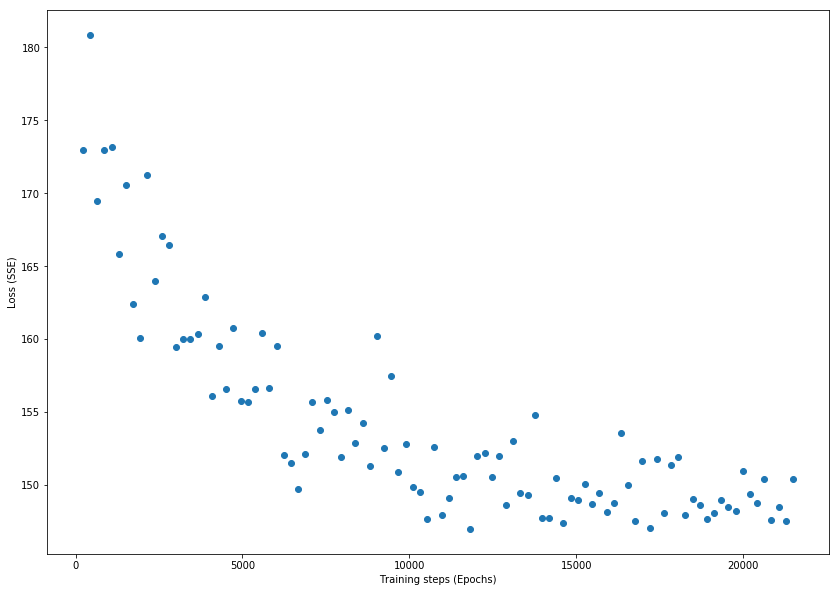

In [71]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps (Epochs)')  
plt.ylabel('Loss (SSE)')  
plt.show() 

In [68]:
pred = regressor.predict(input_fn=avg_temp_pred_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_pred_model/model.ckpt-21500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [69]:
from sklearn import metrics

print("The Explained Variance: %.2f" % metrics.explained_variance_score(y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % metrics.mean_absolute_error(y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % metrics.median_absolute_error(y_test, predictions))
print("The Mean Squared Error: %.2f degrees celsius" % metrics.mean_squared_error(y_test, predictions)) 
print("The Root Mean Squared Error: %.2f degrees celsius" % (np.sqrt(metrics.mean_squared_error(y_test, predictions)))) 

The Explained Variance: 0.94
The Mean Absolute Error: 1.09 degrees Celcius
The Median Absolute Error: 0.80 degrees Celcius
The Mean Squared Error: 2.09 degrees celsius
The Root Mean Squared Error: 1.44 degrees celsius
